In [ ]:
pip install -U fortran-magic 

Requirement already up-to-date: fortran-magic in /usr/local/lib/python3.6/dist-packages (0.7)


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import py_compile as py

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True
example = 2

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.6/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:
- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
# Como su significado indica "acierto" assert tan solo verifica que una condicion retorne true 
assert example, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
li = [5, 'c', 69, -2.6, "one", 39, 'TWO']
li

[5, 'c', 69, -2.6, 'one', 39, 'TWO']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
print('first:', li[0], 'third:', li[2],sep=' ',end='\n')

first: 5 third: 69


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
print('last:', li[-1])
print('second to last:', li[-2])

last: TWO
second to last: 39


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
sublist1 = li[2:len(li)-1]
sublist1

[69, -2.6, 'one', 39]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
last_three = li[3:6]
last_three

[-2.6, 'one', 39]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
other_list = li[4:]
other_list

['one', 39, 'TWO']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
li = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
li[2:10:2]

[2, 4, 6, 8]

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
li[::-1]

[13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
print('Before:',li)
li.append('Also Strings')
print('After:', li)

Before: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
After: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 'Also Strings']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [ ]:
li = [-5, -4, 2, -6, 1]
# Esto es como un for each en el que realiza la operacion a cada elemento de la lista 
[x * -2 for x in li]

[10, 8, -4, 12, -2]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [ ]:
cars = {'Ford': 'Ranger', 'KIA' : 'Picanto', 'Mazda' : 'Mazda 3'}
cars

{'Ford': 'Ranger', 'KIA': 'Picanto', 'Mazda': 'Mazda 3'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [ ]:
cars['Renault'] = 'Logan'
cars

{'Ford': 'Ranger', 'KIA': 'Picanto', 'Mazda': 'Mazda 3', 'Renault': 'Logan'}

In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [ ]:
del cars['KIA']
cars

{'Ford': 'Ranger', 'Mazda': 'Mazda 3', 'Renault': 'Logan'}

In [ ]:
# No slicing.
# philosophers['Bertrand':'Immanuel']

In [ ]:
# Los directiorios no periten hacer slicing 
# cars['Ford':'Ranger']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
c = [
     [1.5, 2, 9],
     [5, 9, 6],
     [1.9, 8.2, 10],
     [2.5, 4, 7]
]

d = [
     [2, 4, 7],
     [4, 8, 15],
     [2, 4, 8],
     [6, 2, 16]
]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [ ]:
def matSum(C, D):
    rows = len(C)
    cols = len(C[0]) 
    out = [[0 for col in range(cols)] for row in range(rows)]

    for i in range(rows):
        for j in range(cols):
           out[i][j] = C[i][j] + D[i][j]
    return out

In [ ]:
%%time

matmul(a, b)

CPU times: user 32 µs, sys: 7 µs, total: 39 µs
Wall time: 62.7 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [ ]:
%%time

matSum(c, d)

CPU times: user 42 µs, sys: 0 ns, total: 42 µs
Wall time: 46.7 µs


[[3.5, 6, 16], [9, 17, 21], [3.9, 12.2, 18], [8.5, 6, 23]]

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.9588155683661944, 0.47618171772458306, 0.32325738620776934],
 [0.9832475777183468, 0.3784993800118531, 0.09236750115546188]]

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 7.44 s, sys: 36.8 ms, total: 7.48 s
Wall time: 7.56 s


In [ ]:
%%time
randC = random_matrix(1000, 4000)
randD = random_matrix(1000, 4000)
y = matSum(randC, randD)

CPU times: user 2.3 s, sys: 1.37 s, total: 3.67 s
Wall time: 3.81 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
# Este comando magico indica que se usara leguaje Fortran
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
bigListData = [float(i) for i in range(1000000)]
npArray = np.array(bigListData)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 9.13 ms, sys: 1.18 ms, total: 10.3 ms
Wall time: 10.5 ms


333328333350000.0

In [ ]:
%%time
python_dot_product(bigListData, bigListData)

CPU times: user 80.8 ms, sys: 1.01 ms, total: 81.9 ms
Wall time: 81.5 ms


3.3333283333312755e+17

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 163 µs, sys: 25 µs, total: 188 µs
Wall time: 194 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(npArray, npArray) 

CPU times: user 1.61 ms, sys: 0 ns, total: 1.61 ms
Wall time: 1.7 ms


3.3333283333312755e+17

## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Pythos al compilar revisa que typo es cada objeto para así poder realizar la operacion de este modo se hace tan lento 
mul_elemwise(['c', 3, 2], [5, 3, 'dedo'])

['ccccc', 9, 'dedodedo']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [ ]:
# La importacion anterior es Disassambler 
source_code = '(listA[0] + listB[0]) * 5'
bytecode = compile(source_code, '', 'eval')
dis.dis(bytecode)

  1           0 LOAD_NAME                0 (listA)
              2 LOAD_CONST               0 (0)
              4 BINARY_SUBSCR
              6 LOAD_NAME                1 (listB)
              8 LOAD_CONST               0 (0)
             10 BINARY_SUBSCR
             12 BINARY_ADD
             14 LOAD_CONST               1 (5)
             16 BINARY_MULTIPLY
             18 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
npData = np.array([5, 15, 3, 8], dtype=float)
npData

array([ 5., 15.,  3.,  8.])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
npData**2

array([ 25., 225.,   9.,  64.])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 217 µs, sys: 1.03 ms, total: 1.25 ms
Wall time: 1.79 ms


333328333350000.0

In [ ]:
%%time
(npArray * npArray).sum()

CPU times: user 3.21 ms, sys: 4.86 ms, total: 8.07 ms
Wall time: 19.3 ms


3.333328333335e+17

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.09 ms, sys: 3.16 ms, total: 4.25 ms
Wall time: 7.09 ms


333328333350000.0

In [ ]:
%%time
npData.dot(npData)

CPU times: user 20 µs, sys: 4 µs, total: 24 µs
Wall time: 26.9 µs


323.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 473 µs, sys: 73 µs, total: 546 µs
Wall time: 1.02 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(npData, npData)
# Se puede observar que la libreria numpy reduce considerablemente el tiempo de ejecuccion sin embargo fortran es mas rapido

CPU times: user 10 µs, sys: 2 µs, total: 12 µs
Wall time: 14.1 µs


323.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
# data[0] = "foo"

In [ ]:
# La libreria numpy es explicitamente para hacer que calculos matematicos en los arreglos por ende no permite Strings
# npData[2] = 'No funciona'

In [ ]:
# We also can't grow an array once it's created.
# data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [ ]:
# Se puede pasar de tener un arreglo a una matriz sin embargo debe ser un arreglo de longitud par 
matriz = npData.reshape(2, 2)
matriz

array([[ 5., 15.],
       [ 3.,  8.]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [ ]:
arr = np.array([3, 5, 1, 2, 5, 8, 4, 8, 2], dtype='int16').reshape(3, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[3 5 1]
 [2 5 8]
 [4 8 2]]
DType: int16
Shape: (3, 3)
Strides: (6, 2)
Data: b'\x03\x00\x05\x00\x01\x00\x02\x00\x05\x00\x08\x00\x04\x00\x08\x00\x02\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Todas las operaciones que se hagan sobre un Numpy Array se aplican a toso los valores que hay en el 
npData = np.arange(20).reshape(4, 5)
npData

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Cualquier tipo de operador binario aritmetico
npData + npData

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18],
       [20, 22, 24, 26, 28],
       [30, 32, 34, 36, 38]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
# Numpy tiene funciones unarioas implementadas
np.exp2(npData)

array([[1.00000e+00, 2.00000e+00, 4.00000e+00, 8.00000e+00, 1.60000e+01],
       [3.20000e+01, 6.40000e+01, 1.28000e+02, 2.56000e+02, 5.12000e+02],
       [1.02400e+03, 2.04800e+03, 4.09600e+03, 8.19200e+03, 1.63840e+04],
       [3.27680e+04, 6.55360e+04, 1.31072e+05, 2.62144e+05, 5.24288e+05]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
# Tambien permite realizar operaciones binarias booleanas
(npData <= 10) 

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True, False, False, False, False],
       [False, False, False, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
(((npData % 2) == 0) & ((npData % 5) == 0))

array([[ True, False, False, False, False],
       [False, False, False, False, False],
       [ True, False, False, False, False],
       [False, False, False, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [ ]:
# @ es usado para multiplicar matrices
npData @ npData.T
# numpy.T es la transpuesta de la matriz

array([[  30,   80,  130,  180],
       [  80,  255,  430,  605],
       [ 130,  430,  730, 1030],
       [ 180,  605, 1030, 1455]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
exp = np.exp(np.linspace(1, 3, 15))
exp

array([ 2.71828183,  3.13571476,  3.61725079,  4.17273388,  4.81351974,
        5.55270788,  6.40540943,  7.3890561 ,  8.52375646,  9.83270708,
       11.34266669, 13.08450324, 15.09382492, 17.41170806, 20.08553692])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
exp[4]

4.813519741131481

In [ ]:
sines[:3]  # First three elements

array([0.        , 0.34185385, 0.64251645])

In [ ]:
exp[:5]

array([2.71828183, 3.13571476, 3.61725079, 4.17273388, 4.81351974])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
exp[2:]

array([ 3.61725079,  4.17273388,  4.81351974,  5.55270788,  6.40540943,
        7.3890561 ,  8.52375646,  9.83270708, 11.34266669, 13.08450324,
       15.09382492, 17.41170806, 20.08553692])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
exp[::3]

array([ 2.71828183,  4.17273388,  6.40540943,  9.83270708, 15.09382492])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# Se pueden usar indicadores booleanos para hacer un slide en el arreglo
print("exp:\n", exp)
print("exp > 5:\n", exp > 5)
print("exp[exp > 5]:\n", exp[exp > 5])

exp:
 [ 2.71828183  3.13571476  3.61725079  4.17273388  4.81351974  5.55270788
  6.40540943  7.3890561   8.52375646  9.83270708 11.34266669 13.08450324
 15.09382492 17.41170806 20.08553692]
exp > 5:
 [False False False False False  True  True  True  True  True  True  True
  True  True  True]
exp[exp > 5]:
 [ 5.55270788  6.40540943  7.3890561   8.52375646  9.83270708 11.34266669
 13.08450324 15.09382492 17.41170806 20.08553692]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
# En Python permite presentar varios indices al mismo tiempo
print(exp)
exp[[4, 14, 3]]

[ 2.71828183  3.13571476  3.61725079  4.17273388  4.81351974  5.55270788
  6.40540943  7.3890561   8.52375646  9.83270708 11.34266669 13.08450324
 15.09382492 17.41170806 20.08553692]


array([ 4.81351974, 20.08553692,  4.17273388])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
npUnsorted = np.array([5, 20, 4, 17, -5, 7, 6, 12])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
# Retorna un arreglo en el que da el orden en que deben ir los indices 
indicesSort = np.argsort(npUnsorted)
indicesSort

array([4, 2, 0, 6, 5, 7, 3, 1])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
npUnsorted[indicesSort]

array([-5,  4,  5,  6,  7, 12, 17, 20])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
market_caps1 = np.array([15.5, 20.8, 2.5, 7, 6.4])
assets1 = np.array(['TLSA', 'CSC', 'APLL', 'RTK', 'ZM'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
# Organiza los activos teniendo en cuenta su capitalizacion de menor a mayor
sort_by_mcap1 = np.argsort(market_caps1)
assets1[sort_by_mcap1]

array(['APLL', 'ZM', 'RTK', 'TLSA', 'CSC'], dtype='<U4')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("npArray:\n", repr(npArray))
print("npData:\n", repr(npData))
print("unsorted:data:\n", repr(unsorted_data))

npArray:
 array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 9.99997e+05,
       9.99998e+05, 9.99999e+05])
npData:
 array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])
unsorted:data:
 array([ 1,  3,  2, 12, -1,  5,  2])


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


In [ ]:
print("npArray:", npArray)
print("npData:", npData)
print("unsorted:data:", unsorted_data)

npArray: [0.00000e+00 1.00000e+00 2.00000e+00 ... 9.99997e+05 9.99998e+05
 9.99999e+05]
npData: [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
unsorted:data: [ 1  3  2 12 -1  5  2]


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
npData = np.arange(15).reshape(3, 5)
npData

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
npData[:3, :3]

array([[ 0,  1,  2],
       [ 5,  6,  7],
       [10, 11, 12]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
npData[:2, [2,3]]

array([[2, 3],
       [7, 8]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [ ]:
npData[(npData[:, 0] % 3) == 0]

array([[0, 1, 2, 3, 4]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0322544357785073

In [ ]:
variance(np.random.standard_normal(20000))

1.0024982923003567

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

In [ ]:
npData = np.arange(50)
npData.mean()

24.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
npData = np.arange(40).reshape(5, 8)
npData

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39]])

In [ ]:
data.mean()

14.5

In [ ]:
npData.mean()

19.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
npData.mean(axis= 0) # El cero indica que va por columnas
# Este parametro indica si computa la media atravez de las columnas o filas

array([16., 17., 18., 19., 20., 21., 22., 23.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [ ]:
npData.mean(axis= 1) # Va por las filas

array([ 3.5, 11.5, 19.5, 27.5, 35.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row1 = np.array([5, 6, 3, -5])
column1 = np.array([[4], [2], [3]])
print("Row:\n", row1, sep='')
print("Column:\n", column1, sep='')

Row:
[ 5  6  3 -5]
Column:
[[4]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [ ]:
row1 + column1

array([[ 9, 10,  7, -1],
       [ 7,  8,  5, -3],
       [ 8,  9,  6, -2]])

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("npData:\n", npData, sep='')
print("Mean:\n", npData.mean(axis=0), sep='')
print("npData - Mean:\n", npData - npData.mean(axis=0), sep='')

npData:
[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]]
Mean:
[16. 17. 18. 19. 20. 21. 22. 23.]
npData - Mean:
[[-16. -16. -16. -16. -16. -16. -16. -16.]
 [ -8.  -8.  -8.  -8.  -8.  -8.  -8.  -8.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  8.   8.   8.   8.   8.   8.   8.   8.]
 [ 16.  16.  16.  16.  16.  16.  16.  16.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
pdSerie = pd.Series(index= ['x', 'y', 'z', 'w'], data=[15, 45, 8, -5])
pdSerie

x    15
y    45
z     8
w    -5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# Permite mirar los indices y valores
print("The index is:", pdSerie.index)
print("The values are:", pdSerie.values)

The index is: Index(['x', 'y', 'z', 'w'], dtype='object')
The values are: [15 45  8 -5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
pdSerie.iloc[3]

-5

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# se puede buscar por la etiqueta sin embargo son diferetes las funciones
pdSerie.loc['z']

8

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# Tambien se puede hacer una slide
pdSerie.iloc[:3]

x    15
y    45
z     8
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Tambien se puede hacer con las etiquetas
pdSerie.loc[: 'y']

x    15
y    45
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
pdSerie.iloc[[1, -2]]

y    45
z     8
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
pdSerie.loc[pdSerie > 3]

x    15
y    45
z     8
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
other_s1 = pd.Series({'a': 12.0, 'w': 15.0, 'd': -30.0, 'z': 4.0})
other_s1

a    12.0
w    15.0
d   -30.0
z     4.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
pdSerie + other_s1

a     NaN
d     NaN
w    10.0
x     NaN
y     NaN
z    12.0
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Se pueden rempazar los valores de diversas formas
(pdSerie + other_s1).fillna(-2)

a    -2.0
d    -2.0
w    10.0
x    -2.0
y    -2.0
z    12.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
# Se debe incluir en el archivo que esta en Github
aapl = pd.read_csv('sample_data/AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# TSLA acciones 
tsla = pd.read_csv('sample_data/TSLA.csv', index_col= 'Date', parse_dates=['Date'])
tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-04,45.377998,45.692001,43.841999,44.136002,44.136002,28805000
2019-09-05,44.500000,45.959999,44.169998,45.916000,45.916000,36976500
2019-09-06,45.439999,45.928001,45.034000,45.490002,45.490002,20947000
2019-09-09,46.000000,46.751999,45.846001,46.358002,46.358002,24013500
2019-09-10,46.160000,47.108002,45.787998,47.108002,47.108002,24418500


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
tsla.iloc[:3, :3]

,Open,High,Low
Date,,,
2019-09-04,45.377998,45.692001,43.841999
2019-09-05,44.500000,45.959999,44.169998
2019-09-06,45.439999,45.928001,45.034000


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


In [ ]:
tsla.loc['2019-12-31': '2020-01-05', ('Open', 'Close', 'Volume')]

,Open,Close,Volume
Date,,,
2019-12-31,81.000000,83.666000,51428500
2020-01-02,84.900002,86.052002,47660500
2020-01-03,88.099998,88.601997,88892500


# Rolling Operations

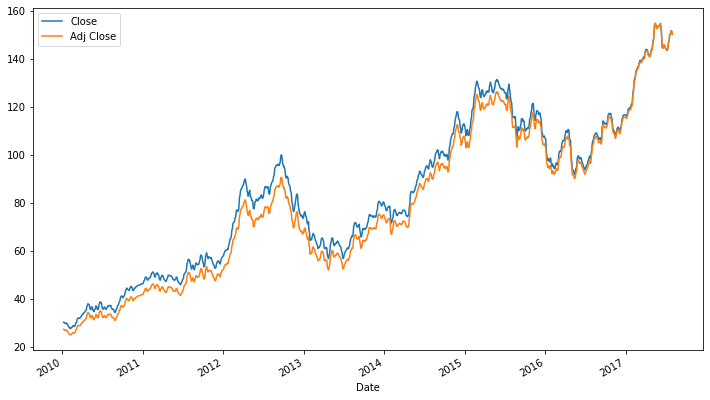

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

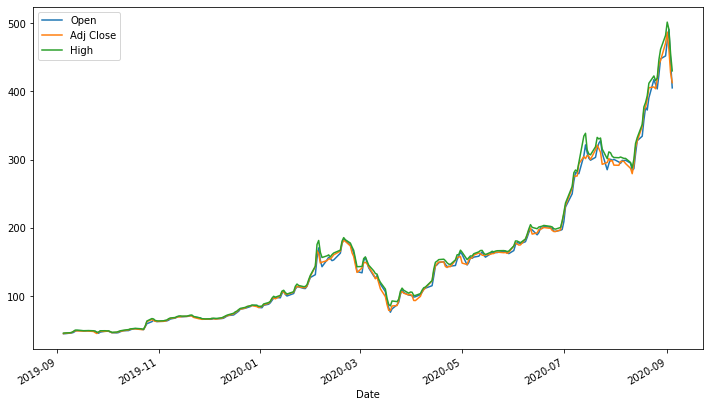

In [ ]:
tsla.rolling(2, center=True)[['Open', 'Adj Close', 'High']].mean().plot();

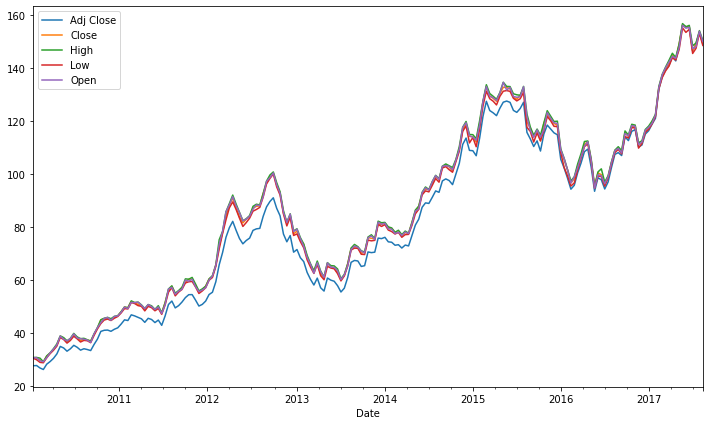

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

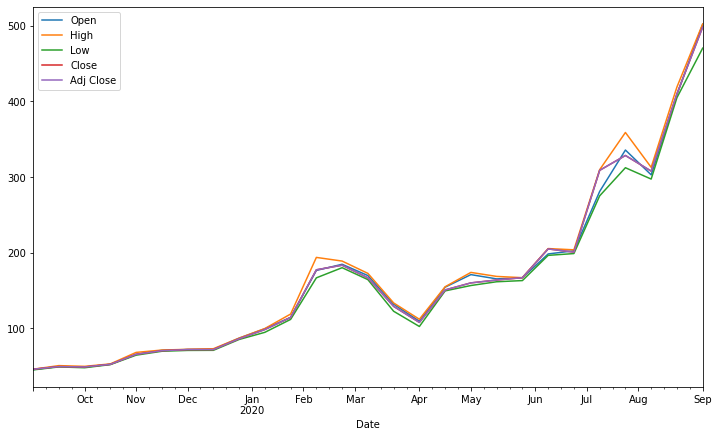

In [ ]:
tsla.drop('Volume', axis = 1).resample('2W').max().plot();

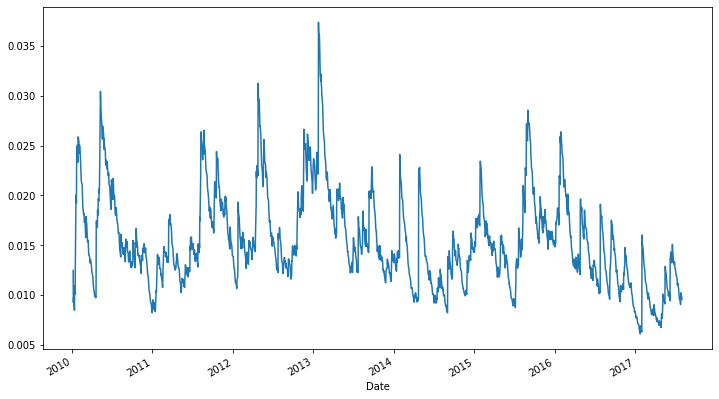

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

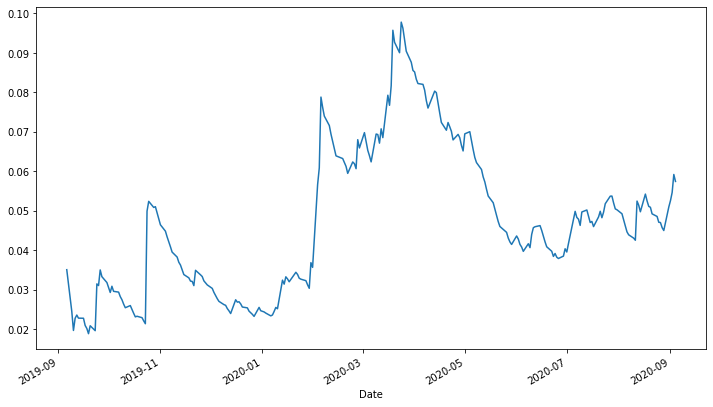

In [ ]:
# pct_change() es el porcentaje de cambio entre un periodo al otro
# ewm() provee funciones poderadas exponenciales (mean() var() std() ...)
tsla['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
avocados1 = read_avocadata('2012', '2014')
avocados1.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [ ]:
tsla.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

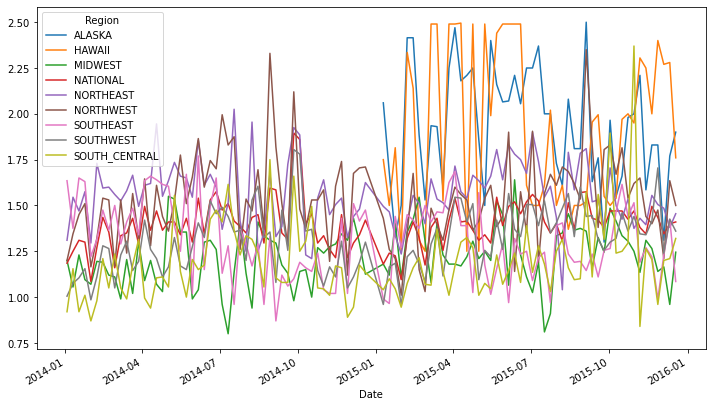

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

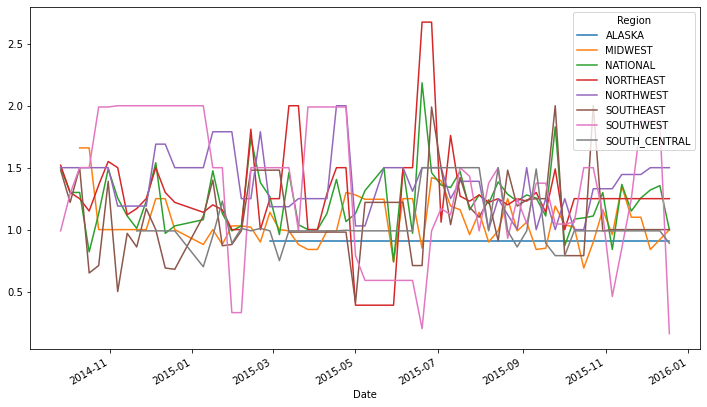

In [ ]:
greenSkin = avocados[avocados.Variety == 'GREENSKIN']
greenSkin.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

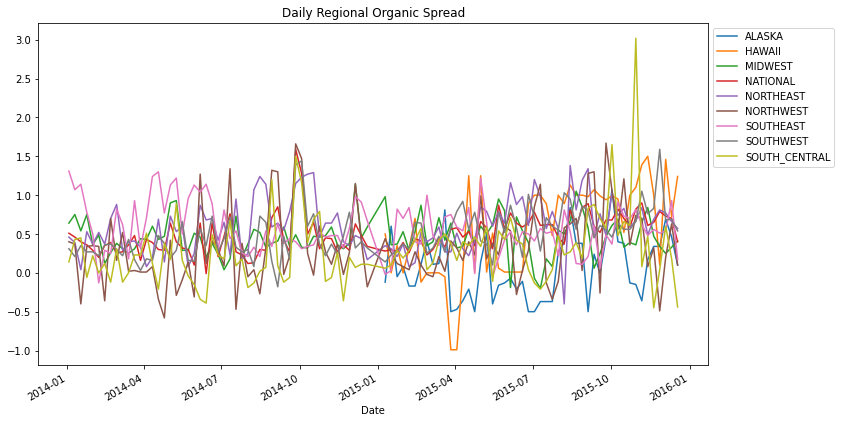

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

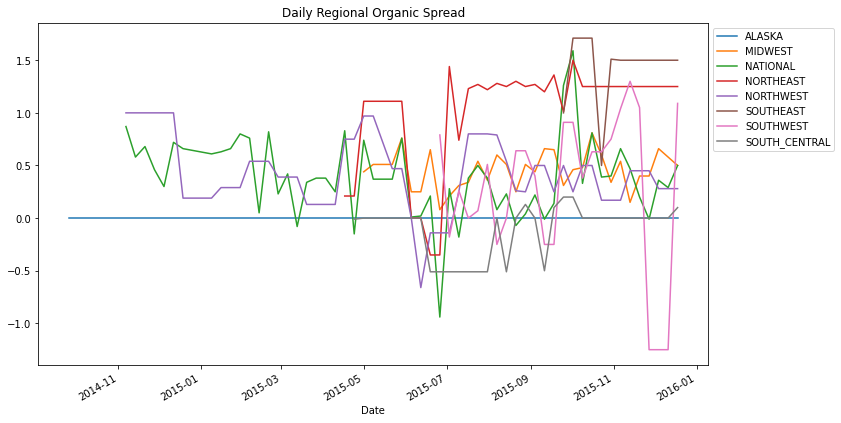

In [ ]:
organic_spread_by_region(greenSkin).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr().fillna(0)
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


In [ ]:
spread_correlation1 = organic_spread_by_region(greenSkin).corr().fillna(0)
spread_correlation1

Region,ALASKA,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,
ALASKA,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MIDWEST,0.0,1.000000,0.326341,0.307174,0.289433,0.041748,-0.346672,0.166863
NATIONAL,0.0,0.326341,1.000000,0.417789,0.299378,0.021097,0.250812,0.401773
NORTHEAST,0.0,0.307174,0.417789,1.000000,0.400814,0.434013,-0.149993,0.248797
NORTHWEST,0.0,0.289433,0.299378,0.400814,1.000000,0.257435,-0.111115,0.004146
SOUTHEAST,0.0,0.041748,0.021097,0.434013,0.257435,1.000000,-0.090884,-0.081374
SOUTHWEST,0.0,-0.346672,0.250812,-0.149993,-0.111115,-0.090884,1.000000,0.179237
SOUTH_CENTRAL,0.0,0.166863,0.401773,0.248797,0.004146,-0.081374,0.179237,1.000000


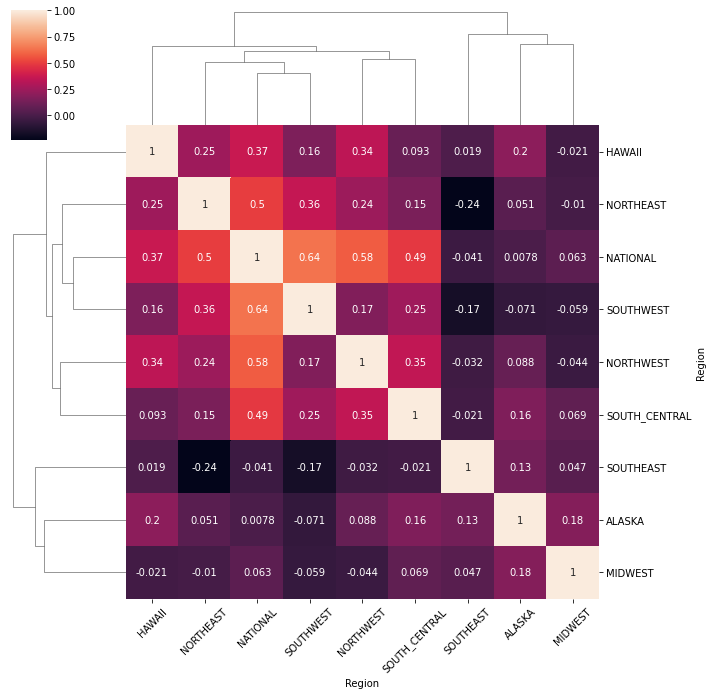

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

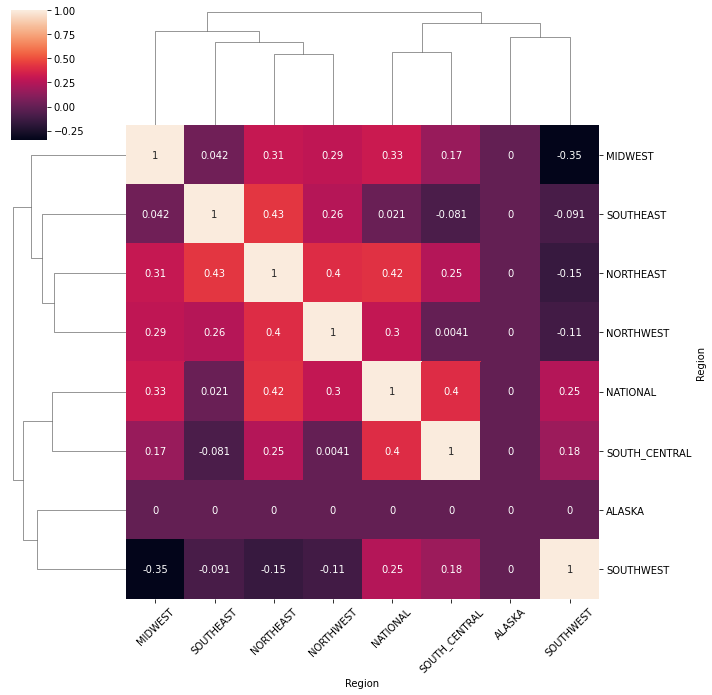

In [ ]:
grid = sns.clustermap(spread_correlation1, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!